# Introduction to Probability and Statistics
|
In this notebook, we will play around with some of the concepts we have previously discussed. Many concepts from probability and statistics are well-represented in major libraries for data processing in Python, such as `numpy` and `pandas`.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random # random number generation
import matplotlib.pyplot as plt # this is used for the plot the graph


## Random Variables and Distributions

Let's start with drawing a sample of 30 variables from a uniform disribution from 0 to 9. We will also compute mean and variance.

In [2]:
sample = [ random.randint(0,20) for _ in range(30) ] # generate 30 random numbers between 0 and 20
print(f"Sample: {sample}") 
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [5, 2, 1, 5, 9, 6, 8, 5, 18, 18, 8, 15, 19, 14, 14, 11, 1, 18, 17, 13, 15, 8, 15, 1, 11, 6, 7, 9, 2, 17]
Mean = 9.933333333333334
Variance = 32.99555555555555


To visually estimate how many different values are there in the sample, we can plot the **histogram**:

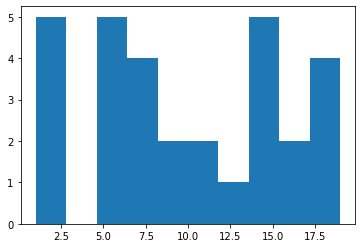

In [3]:
plt.hist(sample)
plt.show()

## Analyzing Real Data

Mean and variance are very important when analyzing real-world data. Let's load the data about baseball players from [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)

In [4]:
df = pd.read_csv("data/SOCR_MLB.tsv",sep='\t',header=None,names=['Name','Team','Role','Height','Weight','Age']) # read the data file into a dataframe object create header
df

,Name,Team,Role,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


> We are using a package called **Pandas** here for data analysis. We will talk more about Pandas and working with data in Python later in this course.

Let's compute average values for age, height and weight:

In [5]:
df.head(20) # Top 20 rows

,Name,Team,Role,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
5,Brian_Roberts,BAL,Second_Baseman,69,176.0,29.39
6,Miguel_Tejada,BAL,Shortstop,69,209.0,30.77
7,Melvin_Mora,BAL,Third_Baseman,71,200.0,35.07
8,Aubrey_Huff,BAL,Third_Baseman,76,231.0,30.19
9,Adam_Stern,BAL,Outfielder,71,180.0,27.05


In [6]:
df[['Age','Height','Weight']].mean() # mean of Age, Height and Weight


Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

Now let's focus on height, and compute standard deviation and variance: 

In [7]:
print(list(df['Height'])[:20]) # list of heights in inches First 20 players

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [8]:
mean = df['Height'].mean() # mean of heights
var = df['Height'].var() # variance of heights
std = df['Height'].std() # standard deviation of heights 
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}") # print the mean, variance and standard deviation

Mean = 73.6972920696325
Variance = 5.316798081118074
Standard Deviation = 2.3058183105175645


In addition to mean, it makes sense to look at median value and quartiles. They can be visualized using **box plot**:

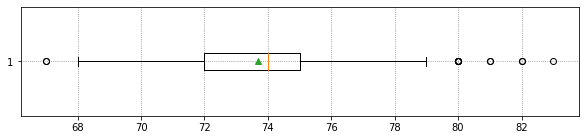

In [9]:
plt.figure(figsize=(10,2)) # create a figure of size 10x2 inches
plt.boxplot(df['Height'],vert=False,showmeans=True) # plot the boxplot of heights
plt.grid(color='gray',linestyle='dotted') # add a grid
plt.show() # show the plot


We can also make box plots of subsets of our dataset, for example, grouped by player role.

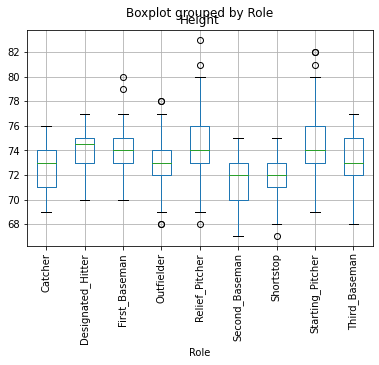

In [10]:
df.boxplot(column='Height',by='Role') # plot the boxplot of heights by Role
plt.xticks(rotation='vertical') # rotate the x-axis labels
plt.show() # show the plot

> **Note**: This diagram suggests, that on average, height of first basemen is higher that height of second basemen. Later we will learn how we can test this hypothesis more formally, and how to demonstrate that our data is statistically significant to show that.  

Age, height and weight are all continuous random variables. What do you think their distribution is? A good way to find out is to plot the histogram of values: 

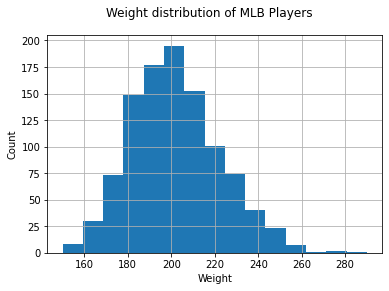

In [11]:
df['Weight'].hist(bins=15) # plot the histogram of weights
plt.suptitle('Weight distribution of MLB Players') # add a title
plt.xlabel('Weight') # add x-axis label
plt.ylabel('Count') # add y-axis label
plt.show()

## Normal Distribution

Let's create an artificial sample of weights that follows normal distribution with the same mean and variance as real data:

In [12]:
generated = np.random.normal(mean,std,1000) # generate 1000 random numbers with mean and standard deviation
generated[:20] # first 20 numbers

array([77.30930697, 73.0893996 , 72.17637146, 71.41168306, 71.98529844,
       73.98085152, 72.93507626, 74.5280123 , 73.49081634, 70.6698562 ,
       74.95328359, 71.69722296, 78.27301854, 72.17282099, 70.72433114,
       70.78366064, 70.8531704 , 72.39394525, 70.85342505, 73.27257257])

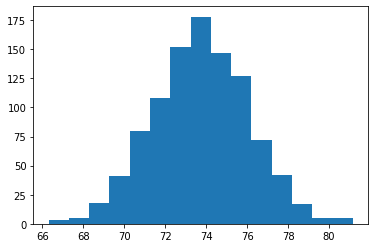

In [13]:
plt.hist(generated,bins=15) # plot the histogram of generated numbers
plt.show() # show the plot 

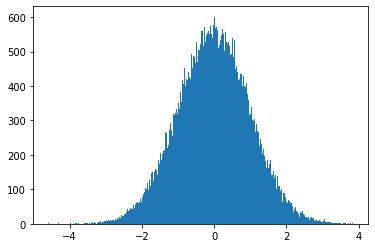

In [14]:
plt.hist(np.random.normal(0,1,50000),bins=300) # plot the histogram of generated numbers with 50000 samples and 300 bins 
plt.show()

Since most values in real life are normally distributed, it means we should not use uniform random number generator to generate sample data. Here is what happens if we try to generate weights with uniform distribution (generated by `np.random.rand`):

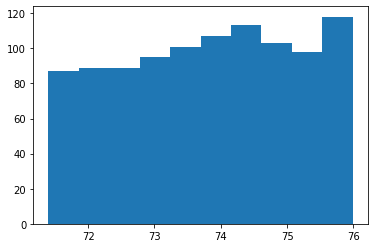

In [15]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.hist(wrong_sample)
plt.show()

## Confidence Intervals

Let's now calculate confidence intervals for the weights and heights of baseball players. We will use the code [from this stackoverflow discussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [16]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95): # calculate the mean and confidence interval
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f}±{h:.2f}")

p=0.85, mean = 201.73±0.94
p=0.90, mean = 201.73±1.08
p=0.95, mean = 201.73±1.28


## Hypothesis Testing

Let's explore different roles in our baseball players dataset:

In [17]:
df.groupby('Role').agg({ 'Height' : 'mean', 'Weight' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height,Weight,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


Let's test the hypothesis that First Basemen are higher then Second Basemen. The simplest way to do it is to test the confidence intervals:

In [18]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


We can see that intervals do not overlap.

More statistically correct way to prove the hypothesis is to use **Student t-test**:

In [19]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738925e-12


Two values returned by the `ttest_ind` functions are:
* p-value can be considered as the probability of two distributions having the same mean. In our case, it is very low, meaning that there is strong evidence supporting that first basemen are taller
* t-value is the intermediate value of normalized mean difference that is used in t-test, and it is compared against threshold value for a given confidence value 

## Simulating Normal Distribution with Central Limit Theorem

Pseudo-random generator in Python is designed to give us uniform distribution. If we want to create a generator for normal distribution, we can use central limit theorem. To get a normally distributed value we will just compute a mean of a uniform-generated sample.

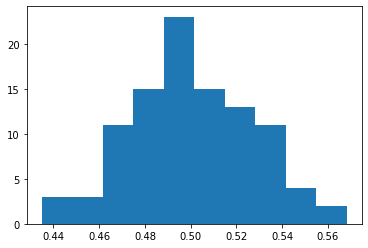

In [20]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.hist(sample)
plt.show()

## Correlation and Evil Baseball Corp

Correlation allows us to find inner connection between data sequences. In our toy example, let's pretend there is an evil baseball corporation that pays it's players according to their height - the taller the player is, the more money he/she gets. Suppose there is a base salary of $1000, and an additional bonus from $0 to $100, depending on height. We will take the real players from MLB, and compute their imaginary salaries:

In [21]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights,salaries))[:10])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181)]


Let's now compute covariance and correlation of those sequences. `np.cov` will give us so-called **covariance matrix**, which is an extension of covariance to multiple variables. The element $M_{ij}$ of the covariance matrix $M$ is a correlation between input variables $X_i$ and $X_j$, and diagonal values $M_{ii}$ is the variance of $X_{i}$. Similarly, `np.corrcoef` will give us **correlation matrix**.

In [22]:
print(f"Covariance matrix:\n{np.cov(heights,salaries)}")
print(f"Covariance = {np.cov(heights,salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.153230230544644
Correlation = 1.0


Correlation equal to 1 means that there is a strong **linear relation** between two variables. We can visually see the linear relation by plotting one value against the other:

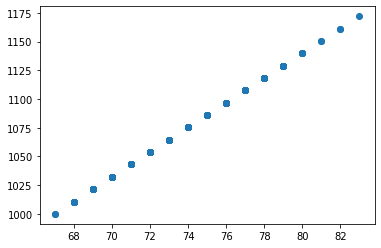

In [23]:
plt.scatter(heights,salaries)
plt.show()

Let's see what happens if the relation is not linear. Suppose that our corporation decided to hide the obvious linear dependency between heights and salaries, and introduced some non-linearity into the formula, such as `sin`:

In [24]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Correlation = 0.9835304456670814


In this case, the correlation is slightly smaller, but it is still quite high. Now, to make the relation even less obvious, we might want to add some extra randomness by adding some random variable to the salary. Let's see what happens:

In [25]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Correlation = 0.9366042307378943


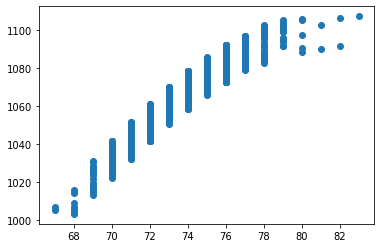

In [26]:
plt.scatter(heights, salaries)
plt.show()

> Can you guess why the dots line up into vertical lines like this?

We have observed the correlation between artificially engineered concept like salary and the observed variable *height*. Let's also see if the two observed variables, such as height and weight, also correlate:

In [27]:
np.corrcoef(df['Height'],df['Weight'])

array([[ 1., nan],
       [nan, nan]])

Unfortunately, we did not get any results - only some strange `nan` values. This is due to the fact that some of the values in our series are undefined, represented as `nan`, which causes the result of the operation to be undefined as well. By looking at the matrix we can see that `Weight` is problematic column, because self-correlation between `Height` values has been computed.

> This example shows the importance of **data preparation** and **cleaning**. Without proper data we cannot compute anything.

Let's use `fillna` method to fill the missing values, and compute the correlation: 

In [28]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

The is indeed a correlation, but not such a strong one as in our artificial example. Indeed, if we look at the scatter plot of one value against the other, the relation would be much less obvious:

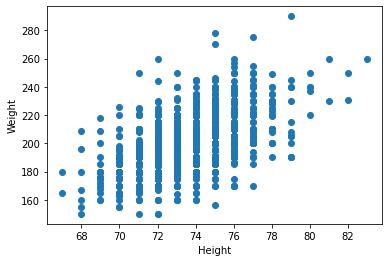

In [29]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Conclusion

In this notebook, we have learnt how to perform basic operations on data to compute statistical functions. We now know how to use sound apparatus of math and statistics in order to prove some hypotheses, and how to compute confidence intervals for random variable given data sample. 

Use the sample code in the notebook to test other hypothesis that:

First basemen and older that second basemen

First basemen and taller than third basemen

Shortstops are taller than second basemen